# IMPORT THE PACKAGES

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ THE DATA

In [2]:
df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
df.shape

(101766, 50)

In [7]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

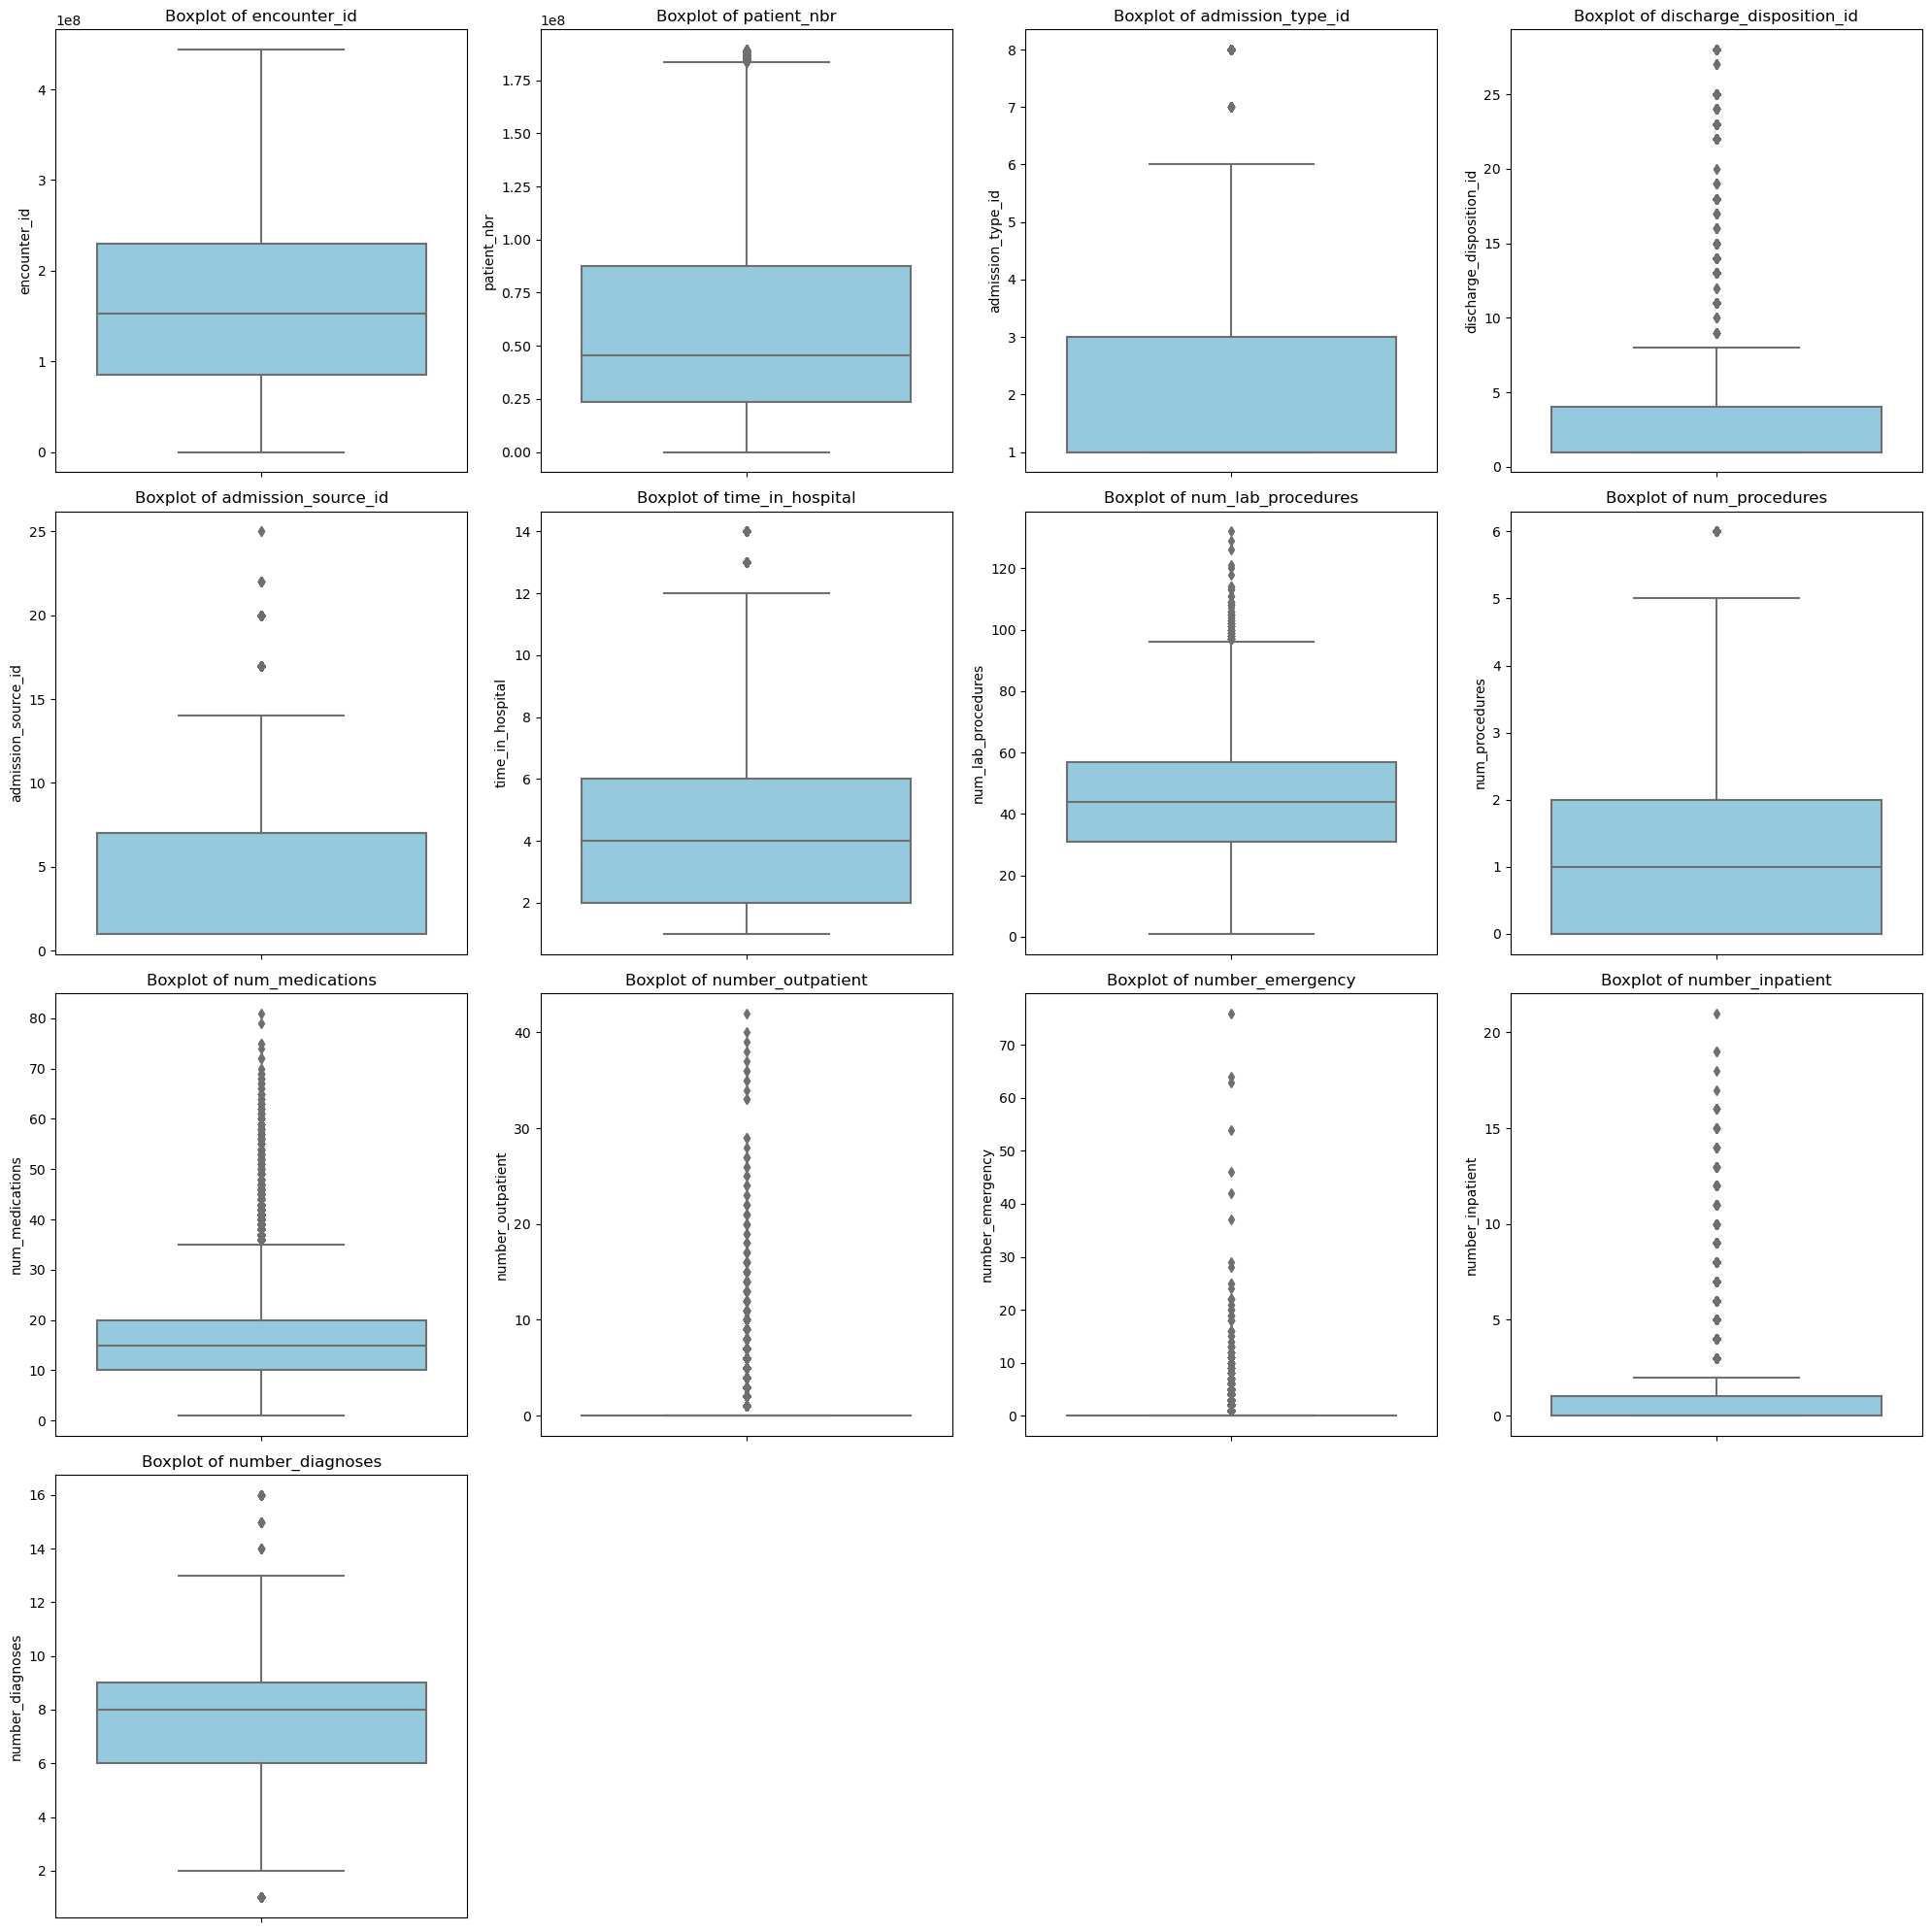

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_balanced is the preprocessed DataFrame with the balanced dataset
# Replace this with your actual DataFrame if needed

# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate the number of rows and columns required for subplots
n_cols = 4  # Set the number of columns for the subplots grid
n_rows = len(numerical_columns) // n_cols + int(len(numerical_columns) % n_cols > 0)  # Calculate rows needed

# Step 3: Create subplots for each numerical feature
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size dynamically based on the number of features

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot with dynamically calculated rows and columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')  # Set title for each boxplot
    plt.tight_layout()  # Adjust layout to avoid overlap

# Show the plot
plt.show()


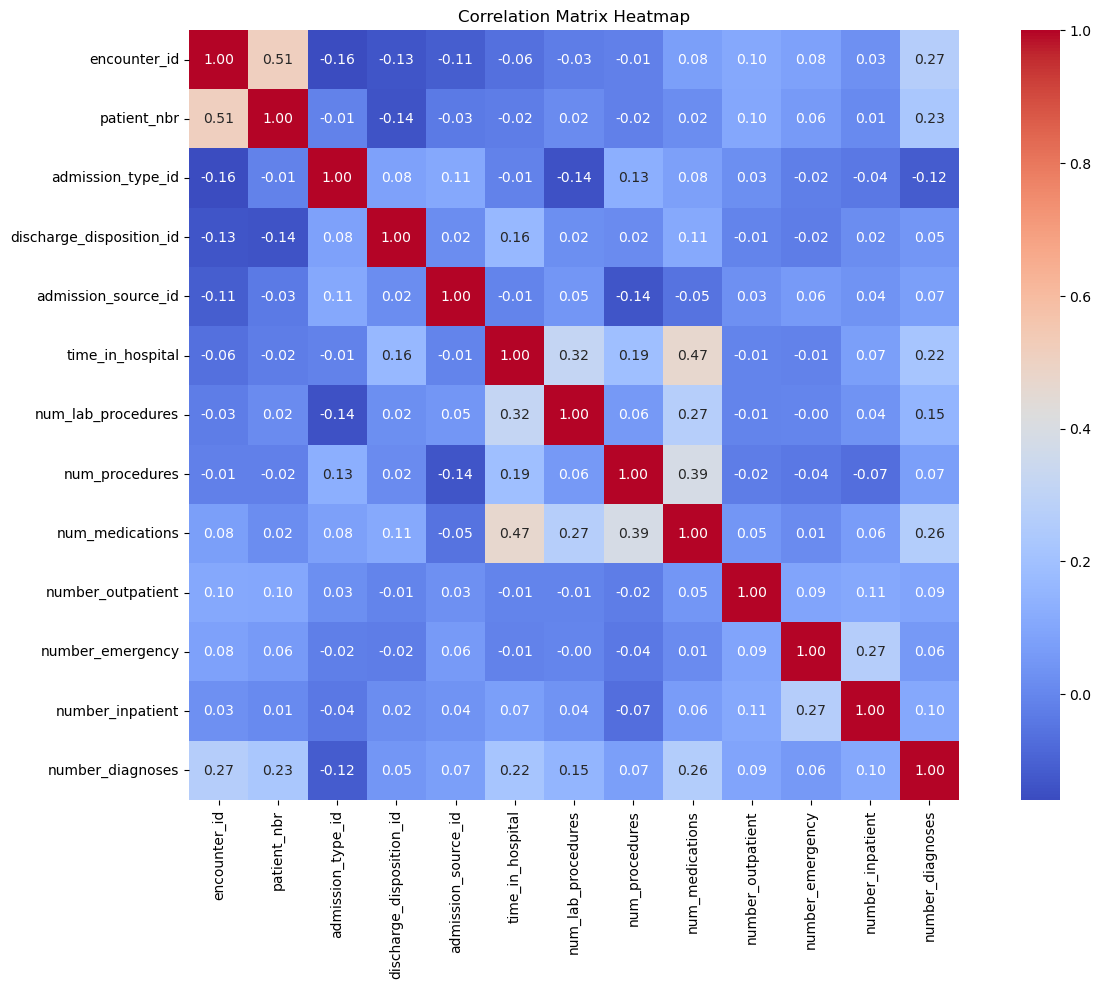

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_balanced is the preprocessed DataFrame with numerical features
# Replace with your actual DataFrame if needed

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# PREPROCESSING

In [10]:
#the dataset contains 4 major sections:1.basic patient info,2.medical records file of the patient,3.medication used by the patient,4.readmission status of patient
#print the unique instances in the target column "readmitted"
unique_instances = df['readmitted'].unique()
print(unique_instances)

['NO' '>30' '<30']


In [11]:
#calculating the % of each unique value in the 'readmitted' column
percentage=df['readmitted'].value_counts(normalize=True)*100
print(percentage)

NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64


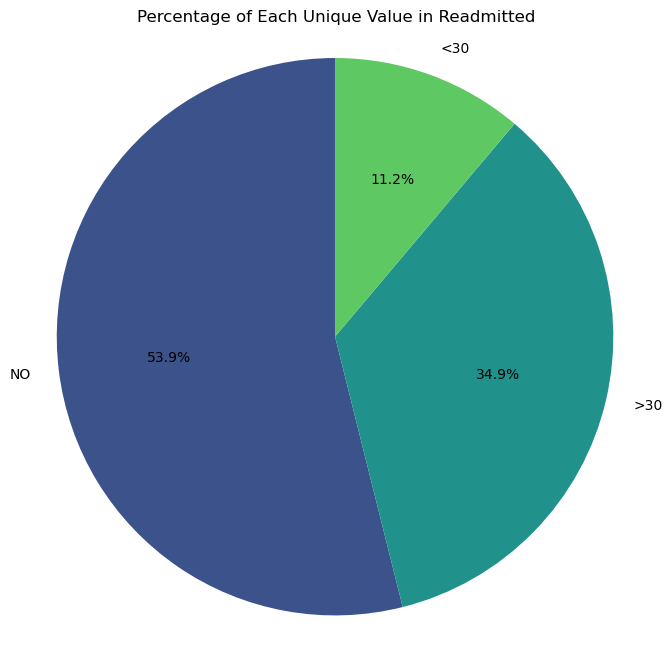

In [12]:
# Step 2: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(percentage)))
plt.title('Percentage of Each Unique Value in Readmitted')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [13]:
#eliminate the instances where the patient has been readmitted after 30 daysof discharge
#remaining we have 65% of the dataset
df_filtered=df[df['readmitted']!='>30']
df=df_filtered

In [14]:
df.shape

(66221, 50)

In [15]:
print(df['readmitted'].unique())

['NO' '<30']


# HANDLING MISSING VALUES

In [16]:
#missing values are represented by '?'
#replace the missing values with NaN
df.replace('?',np.nan,inplace=True)

#check missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 encounter_id                    0
patient_nbr                     0
race                         1735
gender                          0
age                             0
weight                      64534
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  26428
medical_specialty           31733
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         17
diag_2                        284
diag_3                       1085
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride     

In [17]:
#print the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.620015
gender                       0.000000
age                          0.000000
weight                      97.452470
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.908790
medical_specialty           47.919844
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.025672
diag_2                       0.428867
diag_3                       1.638453
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

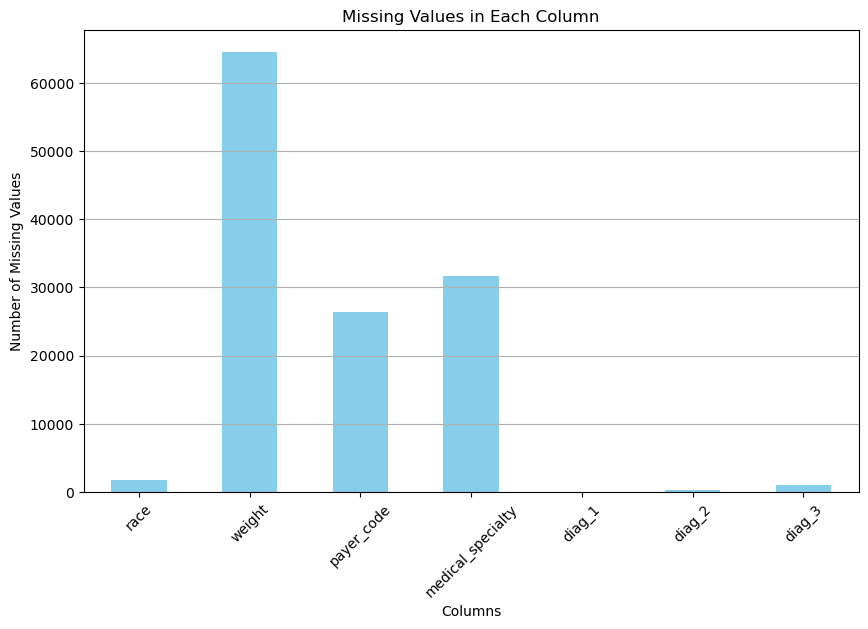

In [18]:
# Step 1: Create a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y')  # Add gridlines for easier reading
plt.show()

# REPLACE MISSING VALUES

In [19]:
#replace the missing values
#numerical missing values by mean and categorical missing values by mode

for column in df.columns:
    if df[column].dtype=='int64':
        mean_value=df[column].mean()
        df[column].fillna(mean_value,inplace=True)
    else:
        mode_value=df[column].mode()[0]
        df[column].fillna(mode_value,inplace=True)
        

In [20]:
#number of instances in the dataset
len(df)

#check if there are any more missing values
missing_values_after=df.isnull().sum()
print(missing_values_after)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [21]:
#remove the unnecessary columns 

df.drop(columns=['weight', 'medical_specialty','encounter_id', 'payer_code', 'patient_nbr','diag_2', 'diag_3'], inplace=True)

medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                      'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                      'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                      'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                      'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

df.drop(columns=medication_columns, inplace=True)

In [22]:
df.shape

(66221, 21)

In [23]:
#print the remaining columns(features)
print(df.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


# FEATURE SELECTION

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
X = df.drop(columns='readmitted')
y = df['readmitted']

# Perform Chi-square test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to show the scores
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'p-value': p_values
})

# Rank the features based on Chi-square score
chi2_df = chi2_df.sort_values(by='Chi2_Score', ascending=False)
print(chi2_df)

# Select top 20 features (if applicable)
selector = SelectKBest(chi2, k=20)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

                     Feature    Chi2_Score        p-value
12          number_inpatient  12674.378813   0.000000e+00
11          number_emergency   3816.177820   0.000000e+00
4   discharge_disposition_id   1116.578899  8.233414e-245
9            num_medications    900.377759  8.122702e-198
10         number_outpatient    838.147047  2.744381e-184
7         num_lab_procedures    749.674823  4.721791e-165
13                    diag_1    714.627534  1.971956e-157
6           time_in_hospital    572.047037  2.013875e-126
14          number_diagnoses    286.366568   3.077976e-64
8             num_procedures    113.538755   1.644358e-26
5        admission_source_id     78.526950   7.891428e-19
18                    change     40.416279   2.052240e-10
19               diabetesMed     39.236452   3.754646e-10
2                        age     23.869465   1.030941e-06
3          admission_type_id     13.621608   2.235971e-04
1                     gender      3.124423   7.712717e-02
16            

# CHANGE CATEGORICAL VALUES TO NUMERICAL VALUES

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder=LabelEncoder()
categorical_columns=['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 
                       'insulin', 'change', 'diabetesMed', 'readmitted']

for column in categorical_columns:
    df[column]=label_encoder.fit_transform(df[column])
    


In [26]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,41,0,1,...,0,0,118,1,2,2,1,1,0,1
2,0,0,2,1,1,7,2,11,5,13,...,0,1,436,6,2,2,1,1,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,0,533,7,2,2,3,0,1,1
4,2,1,4,1,1,7,1,51,0,8,...,0,0,50,5,2,2,2,0,1,1
6,2,1,6,3,1,2,4,70,1,21,...,0,0,251,7,2,2,2,0,1,1


# BALANCING THE DATA

# NEAR MISS UNDERSAMPLING 

In [27]:
from imblearn.under_sampling import NearMiss

# Step 1: Apply NearMiss
nearmiss = NearMiss()
X_balanced, y_balanced = nearmiss.fit_resample(X, y)

# Step 2: Convert back to DataFrame if needed
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['readmitted'] = y_balanced

# Display the class distribution
print("Class distribution after NearMiss:")
print(df_balanced['readmitted'].value_counts())


Class distribution after NearMiss:
0    11357
1    11357
Name: readmitted, dtype: int64


In [28]:
df_balanced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,1,6,2,1,4,7,62,0,11,...,0,0,22,7,2,2,2,0,1,0
1,2,0,4,1,3,7,7,60,0,15,...,1,0,264,8,2,2,0,0,1,0
2,0,1,5,1,1,7,4,45,4,17,...,0,0,247,8,2,2,2,0,1,0
3,2,0,7,3,5,4,9,25,3,16,...,0,2,264,7,2,2,0,0,1,0
4,0,1,5,2,1,2,4,40,1,14,...,0,0,49,9,2,2,1,1,0,0


# SVM MODEL 

In [29]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selecition import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from imblearn.under_sampling import NearMiss  # Import NearMiss from imbalanced-learn


# Step 1: Separate features (X) and target variable (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Step 2: Apply NearMiss to balance the classes
nm = NearMiss()
X_balanced, y_balanced = nm.fit_resample(X, y)

# Step 3: Convert back to DataFrame to maintain original structure if needed
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['readmitted'] = y_balanced

# Step 4: Separate features and target variable again after balancing
X = df_balanced.drop(columns=['readmitted'])  # Feature columns
y = df_balanced['readmitted']                 # Target column

# Step 5: Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 6: Define the SVM model with specified parameters
svm_model = svm.SVC(C=1, gamma=0.1, kernel='rbf', random_state=42)

# Step 7: Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=0),
    'recall': make_scorer(recall_score, pos_label=0),
    'f1': make_scorer(f1_score, pos_label=0)
}

# Step 8: Perform 10-fold cross-validation
cv_results = cross_validate(svm_model, X_normalized, y, cv=10, scoring=scoring)

# Step 9: Display the evaluation metrics
print(f"Accuracy (Mean): {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision (Mean): {cv_results['test_precision'].mean():.4f}")
print(f"Recall (Mean): {cv_results['test_recall'].mean():.4f}")
print(f"F-Measure (Mean): {cv_results['test_f1'].mean():.4f}")


Accuracy (Mean): 0.7665
Precision (Mean): 0.8217
Recall (Mean): 0.6852
F-Measure (Mean): 0.7465


# NEURAL NETWORK

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier for Neural Network
from imblearn.under_sampling import NearMiss  # Import NearMiss from imbalanced-learn


# Define the Neural Network model with specified parameters
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, alpha=0.001, random_state=42)

#  Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=0),
    'recall': make_scorer(recall_score, pos_label=0),
    'f1': make_scorer(f1_score, pos_label=0)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(nn_model, X_normalized, y, cv=10, scoring=scoring)

# Display the evaluation metrics
print(f"Accuracy (Mean): {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision (Mean): {cv_results['test_precision'].mean():.4f}")
print(f"Recall (Mean): {cv_results['test_recall'].mean():.4f}")
print(f"F-Measure (Mean): {cv_results['test_f1'].mean():.4f}")


C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\priyamohanraj\anaconda3\lib\sit

Accuracy (Mean): 0.7493
Precision (Mean): 0.7809
Recall (Mean): 0.6995
F-Measure (Mean): 0.7371


C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# RANDOM FOREST

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from imblearn.under_sampling import NearMiss  # Import NearMiss for balancing


#  Define the Random Forest model with Gini index and specified parameters
rf_model = RandomForestClassifier(n_estimators=150, max_depth=12, criterion='gini', random_state=42)

#  Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=0),
    'recall': make_scorer(recall_score, pos_label=0),
    'f1': make_scorer(f1_score, pos_label=0)
}

#  Perform 10-fold cross-validation
cv_results = cross_validate(rf_model, X_normalized, y, cv=10, scoring=scoring)

#  Display the evaluation metrics
print(f"Accuracy (Mean): {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision (Mean): {cv_results['test_precision'].mean():.4f}")
print(f"Recall (Mean): {cv_results['test_recall'].mean():.4f}")
print(f"F-Measure (Mean): {cv_results['test_f1'].mean():.4f}")


Accuracy (Mean): 0.7737
Precision (Mean): 0.8188
Recall (Mean): 0.7097
F-Measure (Mean): 0.7592


C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


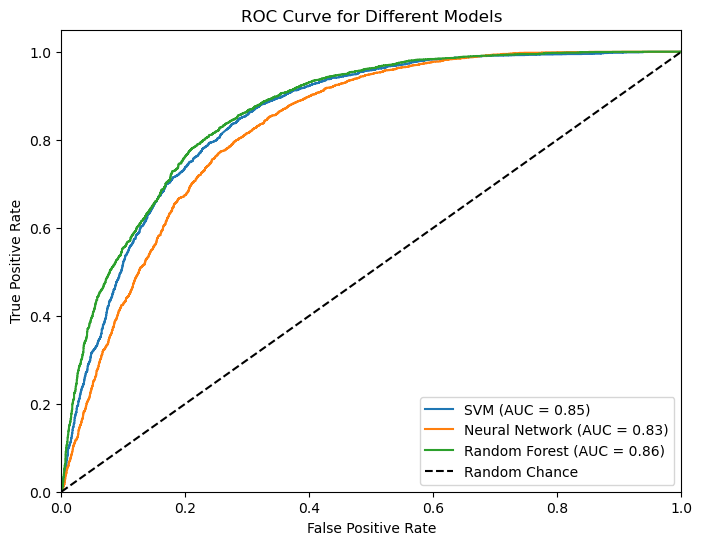

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

# Step 1: Separate features (X) and target variable (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Step 2: Apply NearMiss to balance the classes
nm = NearMiss()
X_balanced, y_balanced = nm.fit_resample(X, y)

# Step 3: Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_balanced)

# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_balanced, test_size=0.3, random_state=42)

# Step 5: Define the models
svm_model = svm.SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)  # Enable probability=True for AUC
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, alpha=0.001, random_state=42)
rf_model = RandomForestClassifier(n_estimators=150, max_depth=12, criterion='gini', random_state=42)

# Step 6: Train the models
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 7: Get predicted probabilities for AUC calculation
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # SVM
y_pred_prob_nn = nn_model.predict_proba(X_test)[:, 1]    # Neural Network
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]    # Random Forest

# Step 8: Calculate AUC and ROC curve for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Step 9: Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()


C:\Users\priyamohanraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


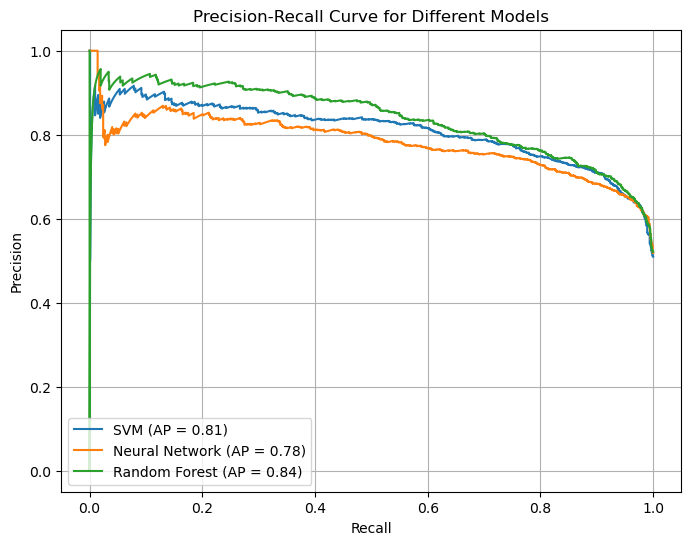

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

# Step 1: Separate features (X) and target variable (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Step 2: Apply NearMiss to balance the classes
nm = NearMiss()
X_balanced, y_balanced = nm.fit_resample(X, y)

# Step 3: Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_balanced)

# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_balanced, test_size=0.1, random_state=42)

# Step 5: Define the models
svm_model = svm.SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)  # Enable probability=True for PR curve
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, alpha=0.001, random_state=42)
rf_model = RandomForestClassifier(n_estimators=150, max_depth=12, criterion='gini', random_state=42)

# Step 6: Train the models
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 7: Get predicted probabilities for Precision-Recall calculation
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # SVM
y_pred_prob_nn = nn_model.predict_proba(X_test)[:, 1]    # Neural Network
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]    # Random Forest

# Step 8: Calculate Precision-Recall curve and Average Precision (AP) for each model
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_prob_svm)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_prob_nn)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)

ap_svm = average_precision_score(y_test, y_pred_prob_svm)
ap_nn = average_precision_score(y_test, y_pred_prob_nn)
ap_rf = average_precision_score(y_test, y_pred_prob_rf)

# Step 9: Plot the Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})')
plt.plot(recall_nn, precision_nn, label=f'Neural Network (AP = {ap_nn:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# AVERAGE ENSEMBLE MODEL (SVM+RF)

In [30]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load your balanced data (replace df with df_balanced)
X = df_balanced.drop(columns=['readmitted'])  # Features (everything except 'readmitted')
y = df_balanced['readmitted']  # Target variable ('readmitted')

# Split the data into training and testing sets (90% train, 10% test as per the mentioned criteria)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers with the specified parameters
svm_rbf = SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)  # SVM with RBF kernel
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest with 100 trees

# Train classifiers
svm_rbf.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Function to get ensemble predictions based on averaged probabilities
def ensemble_predict(X):
    # Get the predicted probabilities for each class from both models
    prob_svm = svm_rbf.predict_proba(X)
    prob_rf = rf.predict_proba(X)

    # Average the probabilities
    avg_prob = (prob_svm + prob_rf) / 2

    # Get the final prediction based on the highest average probability
    final_predictions = np.argmax(avg_prob, axis=1)

    # Convert numerical predictions back to class labels
    class_labels = svm_rbf.classes_  # Both models should have the same class order
    return class_labels[final_predictions]

# Get predictions for the test set
y_pred_ensemble = ensemble_predict(X_test_scaled)

# Evaluate the ensemble model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Return metrics as a list for tabulate
    return [model_name, accuracy, precision, recall, f1]

# Evaluate the ensemble model and store the results
ensemble_results = evaluate_model(y_test, y_pred_ensemble, "Ensemble (SVM + RF)")

# Create a list of lists to store results for tabulate
results = [ensemble_results]

# Print results in a table format
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(results, headers=headers, tablefmt="grid"))


+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| Ensemble (SVM + RF) |   0.786532 |    0.789779 | 0.786532 |   0.786127 |
+---------------------+------------+-------------+----------+------------+


# XGBOOST MODEL

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load your balanced data (replace df_balanced with your dataset)
X = df_balanced.drop(columns=['readmitted'])  # Features (everything except 'readmitted')
y = df_balanced['readmitted']  # Target variable ('readmitted')

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features (optional for tree-based models like XGBoost, but helpful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier with some common parameters
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Return metrics as a list for tabulate
    return [model_name, accuracy, precision, recall, f1]

# Evaluate the XGBoost model
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Create a list of lists to store results for tabulate
results = [xgb_results]

# Print results in a table format
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(results, headers=headers, tablefmt="grid"))


C:\Users\priyamohanraj\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


+---------+------------+-------------+----------+------------+
| Model   |   Accuracy |   Precision |   Recall |   F1 Score |
+=========+============+=============+==========+============+
| XGBoost |   0.805018 |    0.810241 | 0.805018 |   0.804406 |
+---------+------------+-------------+----------+------------+


# STACKED MODEL(SVM+RF+XGBOOST)

In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load your balanced data (replace df_balanced with your dataset)
X = df_balanced.drop(columns=['readmitted'])  # Features
y = df_balanced['readmitted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features (especially important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base models
svm_rbf = SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the stacking classifier
stacked_model = StackingClassifier(
    estimators=[
        ('svm', svm_rbf),
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(),  # You can use another meta-learner (e.g., another XGBoost)
    cv=5  # Number of cross-validation folds
)

# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_stacked = stacked_model.predict(X_test_scaled)

# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Return metrics as a list for tabulate
    return [model_name, accuracy, precision, recall, f1]

# Evaluate the stacked model
stacked_results = evaluate_model(y_test, y_pred_stacked, "Stacked (SVM + RF + XGBoost)")

# Create a list of lists to store results for tabulate
results = [stacked_results]

# Print results in a table format
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(results, headers=headers, tablefmt="grid"))


C:\Users\priyamohanraj\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\priyamohanraj\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\priyamohanraj\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\priyamohan

+------------------------------+------------+-------------+----------+------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score |
+==============================+============+=============+==========+============+
| Stacked (SVM + RF + XGBoost) |   0.805458 |    0.808376 | 0.805458 |   0.805154 |
+------------------------------+------------+-------------+----------+------------+


In [36]:
!pip install catboost

# CATBOOST MODEL

In [37]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data
# Assuming df_balanced is your balanced DataFrame and 'readmitted' is the target variable
X = df_balanced.drop('readmitted', axis=1)
y = df_balanced['readmitted']  # Use df_balanced for target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the CatBoost model
model = CatBoostClassifier(
    iterations=1000,        # Number of boosting iterations
    learning_rate=0.1,      # Learning rate
    depth=6,                # Depth of the tree
    eval_metric='Accuracy', # Evaluation metric
    random_state=42,
    verbose=100             # Print training progress every 100 iterations
)

# Step 4: Fit the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


0:	learn: 0.7215343	total: 119ms	remaining: 1m 58s
100:	learn: 0.8093666	total: 1.99s	remaining: 17.7s
200:	learn: 0.8384789	total: 3.88s	remaining: 15.4s
300:	learn: 0.8521820	total: 5.78s	remaining: 13.4s
400:	learn: 0.8667107	total: 7.68s	remaining: 11.5s
500:	learn: 0.8767267	total: 9.59s	remaining: 9.55s
600:	learn: 0.8854218	total: 11.5s	remaining: 7.63s
700:	learn: 0.8942821	total: 13.4s	remaining: 5.7s
800:	learn: 0.9001156	total: 15.3s	remaining: 3.79s
900:	learn: 0.9063893	total: 17.2s	remaining: 1.89s
999:	learn: 0.9131583	total: 19.1s	remaining: 0us
Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.85      0.75      0.79      2289
           1       0.77      0.86      0.81      2254

    accuracy                           0.80      4543
   macro avg       0.81      0.80      0.80      4543
weighted avg       0.81      0.80      0.80      4543



# ADABOOST MODEL

In [38]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data
X = df_balanced.drop('readmitted', axis=1)
y = df_balanced['readmitted']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=3)  # You can adjust this parameter
model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,         # Number of boosting iterations
    learning_rate=1.0,        # Learning rate
    random_state=42
)

# Step 4: Fit the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7918
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2289
           1       0.76      0.85      0.80      2254

    accuracy                           0.79      4543
   macro avg       0.80      0.79      0.79      4543
weighted avg       0.80      0.79      0.79      4543



In [39]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [3, 5, 7]
}


# Set up Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validated accuracy: {grid_search.best_score_:.4f}')


Best parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validated accuracy: 0.8027


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load your balanced data (replace df_balanced with your dataset)
X = df_balanced.drop(columns=['readmitted'])  # Features (everything except 'readmitted')
y = df_balanced['readmitted']  # Target variable ('readmitted')

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features (optional for tree-based models like XGBoost, but helpful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameters and their values for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='f1_weighted', cv=10, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Return metrics as a list for tabulate
    return [model_name, accuracy, precision, recall, f1]

# Evaluate the best XGBoost model
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Create a list of lists to store results for tabulate
results = [xgb_results]

# Print results in a table format
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Print the results
print(tabulate(results, headers=headers, tablefmt="grid"))
print(f"\nBest Hyperparameters: {grid_search.best_params_}")


Fitting 10 folds for each of 81 candidates, totalling 810 fits


C:\Users\priyamohanraj\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


+---------+------------+-------------+----------+------------+
| Model   |   Accuracy |   Precision |   Recall |   F1 Score |
+=========+============+=============+==========+============+
| XGBoost |   0.801937 |     0.80598 | 0.801937 |   0.801472 |
+---------+------------+-------------+----------+------------+

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Generate some example data
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)       # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 Regularization (Lasso)
alpha = 0.1  # Adjust this parameter for L1 regularization
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {mse_lasso}')

# L2 Regularization (Ridge)
lambda_ = 0.1  # Adjust this parameter for L2 regularization
ridge_model = Ridge(alpha=lambda_)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge MSE: {mse_ridge}')


In [ ]:
#use bayesian optimization
#ensemble models
#rnn or lstms
#auc,f1,acc,precision,recall

In [33]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 568.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

# Step 1: Assume df is your dataframe with all the features and the 'readmitted' target column

# Fill missing values (if necessary)
df = df.fillna(0)  # You can also handle NaNs differently if needed

# Step 2: One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df.drop(columns=['readmitted']))  # Exclude the target column

# Convert the encoded data to a DataFrame for easier handling
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

# Include the target column 'readmitted' (already binary: 0 for no, 1 for yes)
X_encoded_df['readmitted'] = df['readmitted']

# Step 3: Apply the Apriori Algorithm to find frequent itemsets with a minimum support of 10%
frequent_itemsets = apriori(X_encoded_df, min_support=0.1, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Filter rules where 'readmitted' is the consequent
readmission_rules = rules[rules['consequents'].apply(lambda x: 'readmitted' in str(x))]

# Step 6: Sort the rules by confidence or lift to find the strongest ones
readmission_rules_sorted = readmission_rules.sort_values(by='confidence', ascending=False)

# Display the top rules where 'readmitted' is the consequent
print(readmission_rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


C:\Users\priyamohanraj\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                              antecedents  \
822144  (num_procedures_0, admission_type_id_1, admiss...   
745587  (num_procedures_0, admission_type_id_1, admiss...   
822162  (num_procedures_0, admission_type_id_1, admiss...   
761809  (num_procedures_0, admission_type_id_1, number...   
566368  (num_procedures_0, admission_type_id_1, number...   
...                                                   ...   
231175                                  (max_glu_serum_2)   
4703                                    (max_glu_serum_2)   
184763                                  (max_glu_serum_2)   
97905                                   (max_glu_serum_2)   
528891                                  (max_glu_serum_2)   

                                              consequents   support  \
822144                                       (readmitted)  0.111869   
745587                                       (readmitted)  0.112045   
822162                      (readmitted, max_glu_serum

In [39]:
import pandas as pd

# Set display options for a more readable table
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase width for better viewing
pd.set_option('display.max_colwidth', 20)   # Limit column width to improve display
pd.set_option('display.max_rows', 50)       # Limit number of rows displayed (adjust as needed)

# Assuming 'rules' is your DataFrame
print(rules)


                antecedents          consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0                (gender_0)             (race_0)            0.526503            0.175398  0.105970    0.201271  1.147507  0.013622    1.032392       0.271482
1                  (race_0)           (gender_0)            0.175398            0.526503  0.105970    0.604167  1.147507  0.013622    1.196202       0.155889
2       (admission_type_...             (race_0)            0.620851            0.175398  0.129127    0.207985  1.185784  0.020231    1.041143       0.413231
3                  (race_0)  (admission_type_...            0.175398            0.620851  0.129127    0.736195  1.185784  0.020231    1.437232       0.190002
4       (discharge_dispo...             (race_0)            0.622568            0.175398  0.120674    0.193834  1.105104  0.011477    1.022868       0.251987
...                     ...                  ...    

Association Rules with Support Percentage:
                antecedents          consequents  support_percentage  confidence      lift
0                (gender_0)             (race_0)           10.596989    0.201271  1.147507
1                  (race_0)           (gender_0)           10.596989    0.604167  1.147507
2       (admission_type_...             (race_0)           12.912741    0.207985  1.185784
3                  (race_0)  (admission_type_...           12.912741    0.736195  1.185784
4       (discharge_dispo...             (race_0)           12.067447    0.193834  1.105104
...                     ...                  ...                 ...         ...       ...
831887  (number_outpatie...  (readmitted, adm...           10.627807    0.123877  1.083046
831888  (number_inpatien...  (readmitted, adm...           10.627807    0.165774  1.208017
831889  (number_emergenc...  (readmitted, adm...           10.627807    0.119546  1.068205
831890  (discharge_dispo...  (readmitted, adm..

C:\Users\priyamohanraj\AppData\Local\Temp\ipykernel_7708\3767712760.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


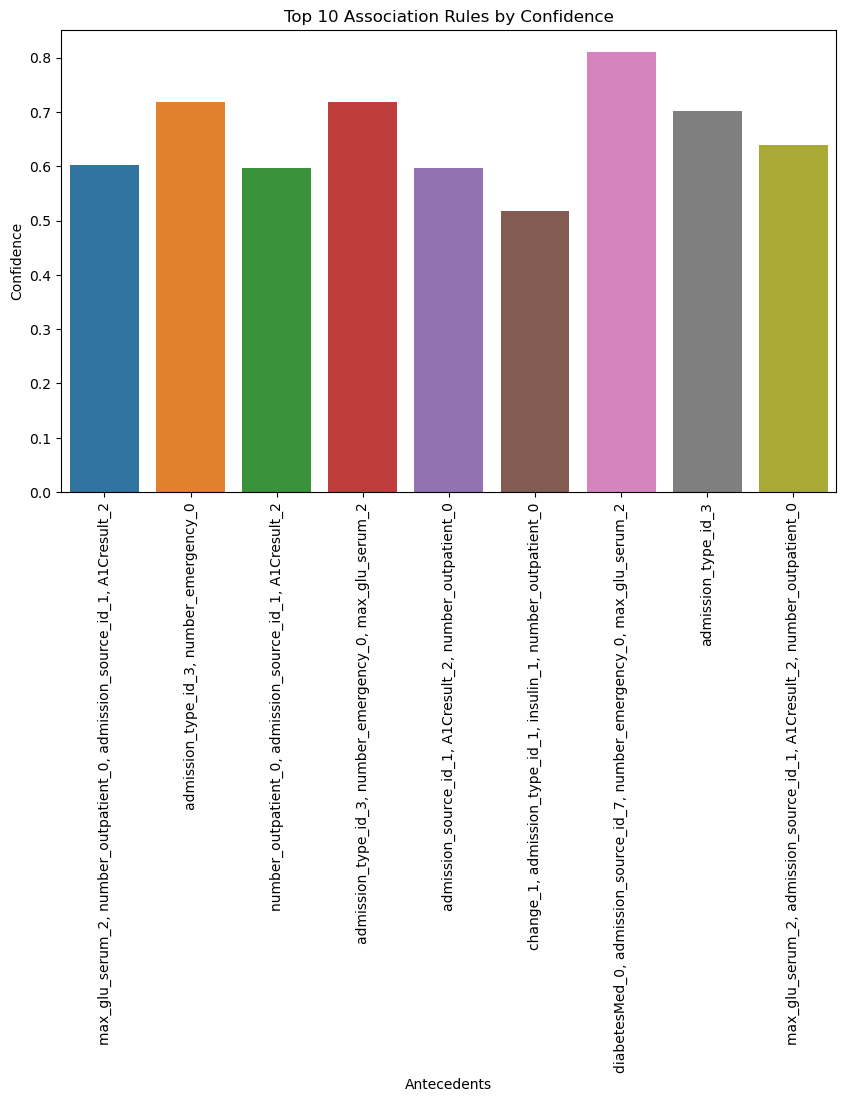

C:\Users\priyamohanraj\AppData\Local\Temp\ipykernel_7708\3767712760.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


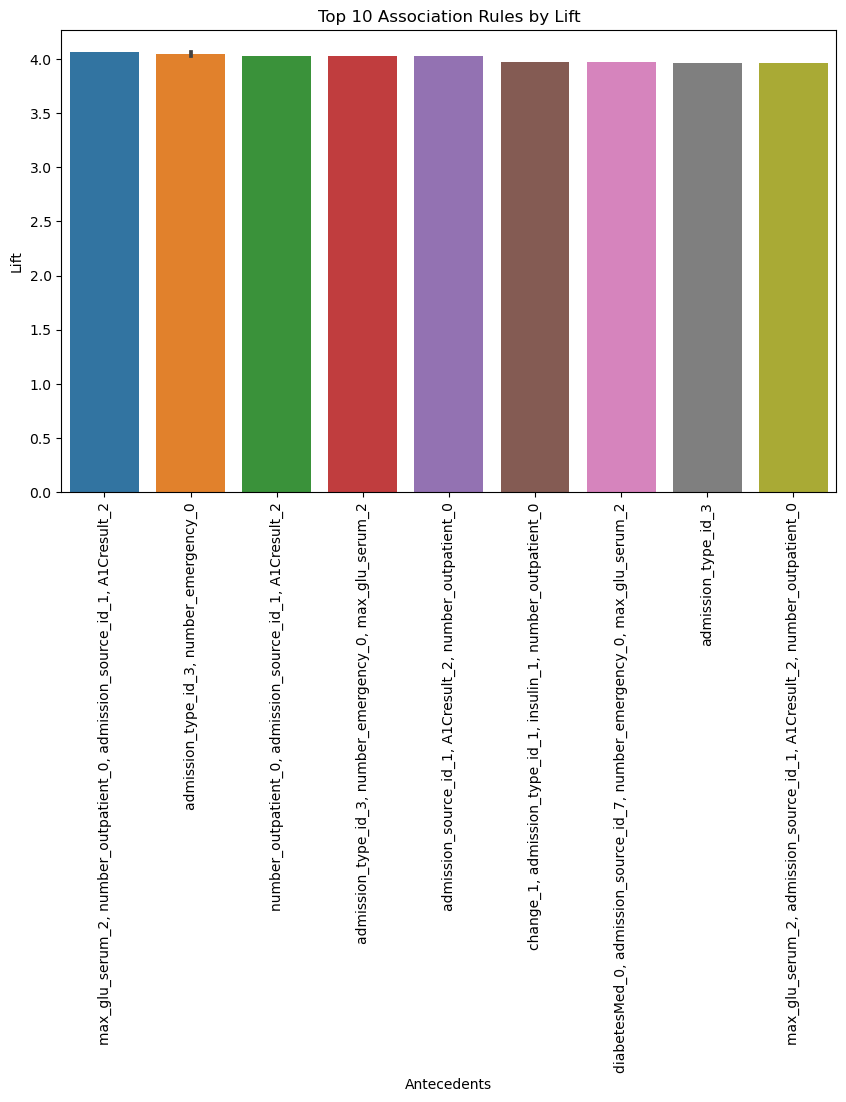


Rule 339021: frozenset({'max_glu_serum_2', 'number_outpatient_0', 'admission_source_id_1', 'A1Cresult_2'}) → frozenset({'admission_type_id_3', 'number_emergency_0'})
  - Support: 10.65%
  - Confidence: 0.60
  - Lift: 4.06

Rule 339066: frozenset({'admission_type_id_3', 'number_emergency_0'}) → frozenset({'max_glu_serum_2', 'number_outpatient_0', 'admission_source_id_1', 'A1Cresult_2'})
  - Support: 10.65%
  - Confidence: 0.72
  - Lift: 4.06

Rule 339034: frozenset({'number_outpatient_0', 'admission_source_id_1', 'A1Cresult_2'}) → frozenset({'admission_type_id_3', 'number_emergency_0', 'max_glu_serum_2'})
  - Support: 10.65%
  - Confidence: 0.60
  - Lift: 4.03

Rule 339053: frozenset({'admission_type_id_3', 'number_emergency_0', 'max_glu_serum_2'}) → frozenset({'number_outpatient_0', 'admission_source_id_1', 'A1Cresult_2'})
  - Support: 10.65%
  - Confidence: 0.72
  - Lift: 4.03

Rule 121040: frozenset({'admission_source_id_1', 'A1Cresult_2', 'number_outpatient_0'}) → frozenset({'admis

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'rules' is your DataFrame with association rules
# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width
pd.set_option('display.max_colwidth', 20)   # Limit column width for better display
pd.set_option('display.max_rows', 50)       # Limit the number of rows displayed

# Convert support to percentage
rules['support_percentage'] = rules['support'] * 100

# Display the updated rules DataFrame with support percentage
print("Association Rules with Support Percentage:")
print(rules[['antecedents', 'consequents', 'support_percentage', 'confidence', 'lift']])

# Find patterns: Count how often each antecedent appears across all rules
antecedents_list = rules['antecedents'].apply(lambda x: list(x)).tolist()
antecedent_counts = Counter([item for sublist in antecedents_list for item in sublist])

# Display the most common antecedents
print("\nFrequency of Antecedents:")
print(antecedent_counts)

# Get top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')

# Bar plot of top 10 rules by confidence
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))), y=top_rules['confidence'])
plt.xticks(rotation=90)
plt.title('Top 10 Association Rules by Confidence')
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

# Bar plot of top 10 rules by lift
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))), y=top_rules['lift'])
plt.xticks(rotation=90)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Antecedents')
plt.ylabel('Lift')
plt.tight_layout()
plt.show()

# Optional: Highlight top insights (you can choose specific rules here based on your findings)
for index, rule in top_rules.iterrows():
    print(f"\nRule {index+1}: {rule['antecedents']} → {rule['consequents']}")
    print(f"  - Support: {rule['support_percentage']:.2f}%")
    print(f"  - Confidence: {rule['confidence']:.2f}")
    print(f"  - Lift: {rule['lift']:.2f}")
